In [2]:
# coding: shift-jis
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_amazon = pd.read_csv('api_data_listbands.csv')

# レビュー値の分布より企業分類
- レビュー件数が10件以上が対象
- 成功企業はレビュー値が4.0以上の企業→サムスン、エイサス、ペブル
- 比較対象はレビュー値が3.5以上、3.8以下の企業→ソニー、モトローラ、ファーウェイ

In [3]:
data_amazon.columns

Index([u'asin', u'date', u'manufacturer', u'price', u'rank', u'average_rate',
       u'num_of_rate', u'review_url'],
      dtype='object')

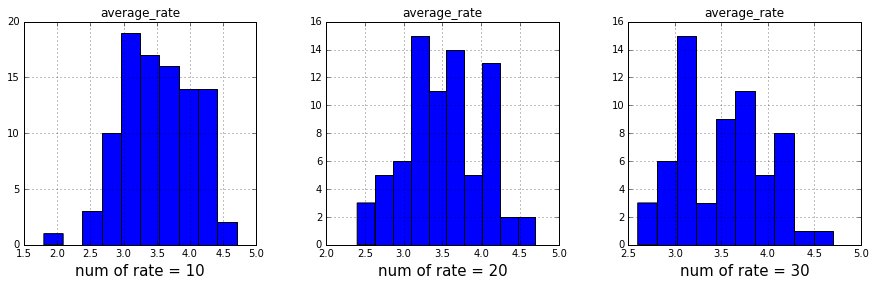

In [4]:
fig = plt.figure(figsize=(15,4))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)
data_amazon[data_amazon['num_of_rate'] >= 10].hist('average_rate',ax=ax1,bins=10)
data_amazon[data_amazon['num_of_rate'] >= 20].hist('average_rate',ax=ax2,bins=10)
data_amazon[data_amazon['num_of_rate'] >= 30].hist('average_rate',ax=ax3,bins=10)
ax1.set_xlabel("num of rate = 10",fontsize=15)
ax2.set_xlabel("num of rate = 20",fontsize=15)
ax3.set_xlabel("num of rate = 30",fontsize=15)
plt.show()

In [5]:
data_10 = data_amazon[data_amazon[u'num_of_rate'] >= 10]
#succeed
suc = data_10[data_10['average_rate']>=4.0]
print('succeeded companies are \n%s') %suc[u'manufacturer'].unique()
#normal
normal = data_10[(data_10['average_rate'] >= 3.5) & (data_10['average_rate'] <= 3.8)]
print('\nnormal companies are \n%s') %str(normal[u'manufacturer'].unique()).decode('string-escape')
#fale
fale = data_10[data_10['average_rate'] < 3.5]
print('\nfalse companies are \n%s') %str(fale[u'manufacturer'].unique()).decode('string-escape')

succeeded companies are 
['Jcotton Design' 'Xiaomi' 'UZOU' 'Fitbit' 'Jawbone' 'MISFIT WEARABLE'
 'GARMIN(\xe3\x82\xac\xe3\x83\xbc\xe3\x83\x9f\xe3\x83\xb3)' 'HUAWEI'
 'Wahoo Fitness' 'MIO'
 'POLAR(\xe3\x83\x9d\xe3\x83\xa9\xe3\x83\xbc\xe3\x83\xab)' 'Lendoo' 'lW']

normal companies are 
[nan 'Jawbone' 'GARMIN(ガーミン)'
 'Sony' 'MISFIT WEARABLE' 'Fitbit' 'HUAWEI'
 'POLAR(ポラール)' 'Excelvan'
 'RIVERSONG JAPAN' 'null']

false companies are 
['Excelvan' 'UTOVME' nan 'TKMS' 'Jawbone' 'MISFIT WEARABLE'
 'エレコム'
 'ドコモヘルスケア'
 'Wahoo Fitness' 'Fitbit' 'SONY' 'Withings'
 'POLAR(ポラール)']


# 分析

In [ ]:
company_suc = [u'サムスン',u'ASUSTEK COMPUTER INC.','ペブルテクノロジー']
company_nor = [u'モトローラ',u'ソニー',u'ファーウェイ']
data_pat = pd.read_csv('/home/kyohei/wearable/data/01.文献リスト_特許.csv',encoding='SHIFT-JIS')
categories = pd.read_csv('/home/kyohei/wearable/data/T_小区分.csv',encoding='SHIFT-JIS')
data_suc_pat = data_pat[data_pat[u"筆頭出願人名"].isin(company_suc)]
data_fal_pat = data_pat[data_pat[u"筆頭出願人名"].isin(company_nor)]

In [ ]:
data_suc_pat_watch = data_suc_pat[data_suc_pat[u"B0302"]==1]
data_fal_pat_watch = data_fal_pat[data_fal_pat[u"B0302"]==1]
print("成功企業の内訳\n%s"%data_suc_pat_watch[u'筆頭出願人名'].value_counts())
print("\n非成功企業の内訳\n%s"%data_fal_pat_watch[u'筆頭出願人名'].value_counts())

In [ ]:
data_suc_cal = data_suc_pat_watch.iloc[:,19:].count() / float(data_suc_pat_watch.shape[0])
data_fal_cal = data_fal_pat_watch.iloc[:,19:].count() / float(data_fal_pat_watch.shape[0])
compare_category = pd.concat([data_suc_cal,data_fal_cal],axis=1)
compare_category.rename(columns={0:"succeed",1:"normal"},inplace=True)
compare_category["diff"] = compare_category["succeed"] - compare_category["normal"]
compare_category["diff_abs"] = abs(compare_category["succeed"] - compare_category["normal"])

categories = categories.set_index(u"記号",drop=True)
compare_category = pd.concat([compare_category,categories],axis=1)

### プラス域

In [ ]:
compare_category.sort_values('diff',ascending=False).head(20)

### マイナス域 

In [ ]:
compare_category.sort_values('diff',ascending=True).head(30)

### 絶対値

In [ ]:
compare_category[compare_category['diff_abs'] >= 0.2].sort_values('diff_abs',ascending=False)

### 効果・価値

In [ ]:
compare_category[compare_category.index.str.startswith("C01")]

### 全体設計デザイン

In [ ]:
compare_category[compare_category.index.str.startswith("D01")]

### モーションセンサー

In [ ]:
compare_category[compare_category.index.str.startswith("F01")]

### バイタルセンサー

In [ ]:
compare_category[compare_category.index.str.startswith("F02")]

### 医療用途

In [ ]:
compare_category[compare_category.index.str.startswith("H02")]

### ヘルスケア用途

In [ ]:
compare_category[compare_category.index.str.startswith("H03")]

### スポーツ用途

In [ ]:
compare_category[compare_category.index.str.startswith("H04")]

### バイタルデータ

In [ ]:
compare_category[compare_category.index.str.startswith("I07")]